In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

In [18]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
df = pd.read_csv(url)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.shape

(440, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
df.describe(include='all')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [19]:
scale=StandardScaler()
df1=scale.fit_transform(df)
df2=pd.DataFrame(df1,columns=df.columns)
df2.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


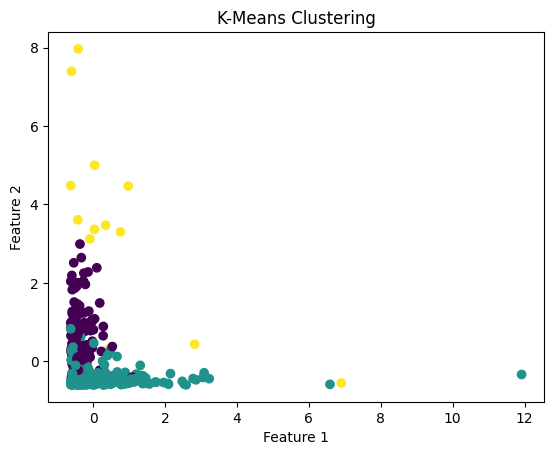

In [30]:
k_means=KMeans(n_clusters=3,random_state=42)
df2['predicted']=k_means.fit_predict(df2)
plt.scatter(df2.iloc[:, 5], df2.iloc[:, 6], c=df2['predicted'], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

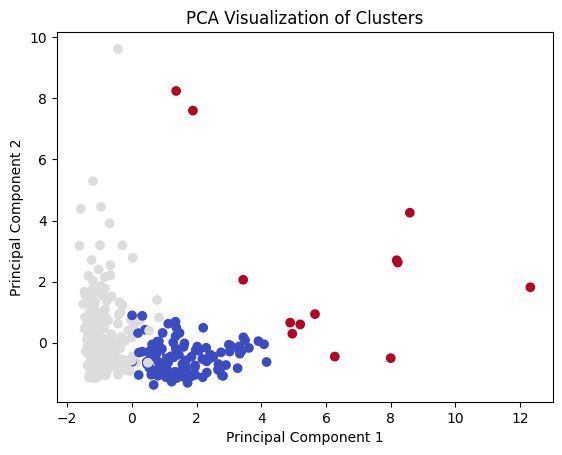

In [34]:
# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df2.iloc[:, :-3])  # Exclude cluster columns

# Visualize PCA-reduced data
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df2['predicted'], cmap='coolwarm')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Clusters")
plt.show()


In [36]:
df_pca.shape

(440, 2)

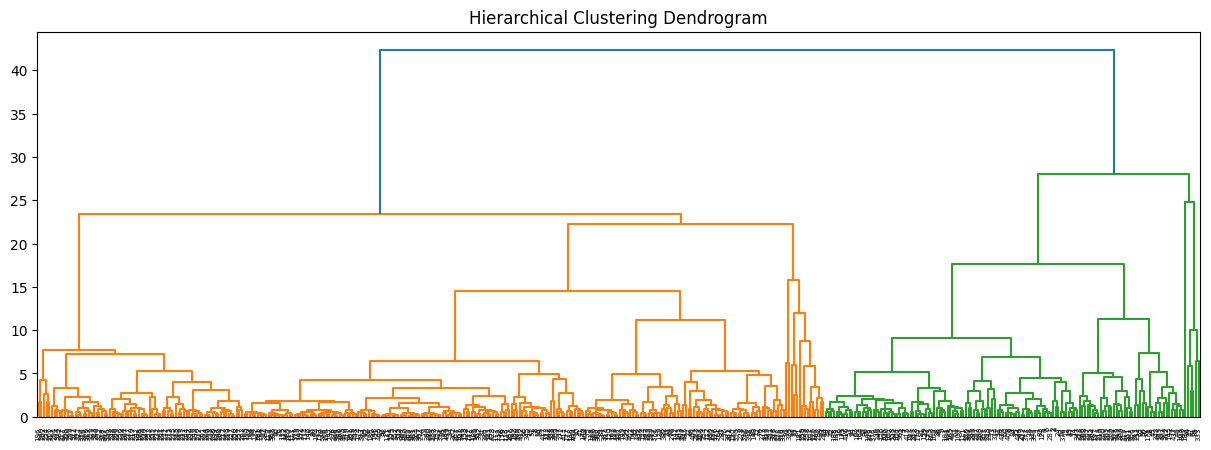

In [32]:
# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
df2['Agglo_Cluster'] = agg_clustering.fit_predict(df2)

# Create a dendrogram
linked = linkage(df2.iloc[:, :-2], method='ward')
plt.figure(figsize=(15, 5))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


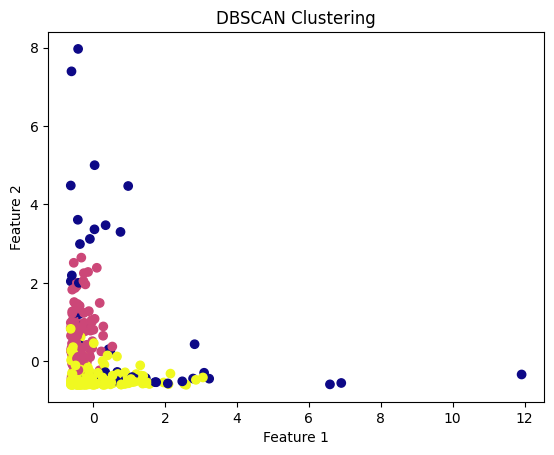

In [38]:
# Apply DBSCAN (Density-Based Clustering)
dbscan = DBSCAN(eps=1.5, min_samples=5)
df2['DBSCAN_Cluster'] = dbscan.fit_predict(df2)

# Visualize DBSCAN clusters
plt.scatter(df2.iloc[:, 5], df2.iloc[:, 6], c=df2['DBSCAN_Cluster'], cmap='plasma')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()


In [39]:
df2

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,predicted,Agglo_Cluster,DBSCAN_Cluster
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0,2,0
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0,2,0
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0,2,-1
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1,1,1
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,1,1,-1
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,1,1,1
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,0,2,0
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,1,1,1


In [43]:
df2['predicted'].value_counts()

,count
predicted,
1,297
0,130
2,13
